<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span></li><li><span><a href="#Frequency-Response" data-toc-modified-id="Frequency-Response-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Frequency Response</a></span><ul class="toc-item"><li><span><a href="#How-do-we-characterize-a-system's-response-to-a-sinusoidal-input?" data-toc-modified-id="How-do-we-characterize-a-system's-response-to-a-sinusoidal-input?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>How do we <em>characterize</em> a system's response to a sinusoidal input?</a></span></li><li><span><a href="#Derivation:-How-can-we-use-a-transfer-function-to-calculate-the-magnitude-ratio-and-phase-lag-of-a-system's-response-to-a-sinusoidal-input?" data-toc-modified-id="Derivation:-How-can-we-use-a-transfer-function-to-calculate-the-magnitude-ratio-and-phase-lag-of-a-system's-response-to-a-sinusoidal-input?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Derivation: How can we use a transfer function to calculate the magnitude ratio and phase lag of a system's response to a sinusoidal input?</a></span></li><li><span><a href="#Disciplined-Process:-Finding-the-amplitude-and-phase-of-a-system's-response-to-a-sinusoidal-input" data-toc-modified-id="Disciplined-Process:-Finding-the-amplitude-and-phase-of-a-system's-response-to-a-sinusoidal-input-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><em>Disciplined Process:</em> Finding the amplitude and phase of a system's response to a sinusoidal input</a></span></li></ul></li><li><span><a href="#Example:-Find-the-magnitude-and-phase-of-a-steady-state-sinusoidal-response" data-toc-modified-id="Example:-Find-the-magnitude-and-phase-of-a-steady-state-sinusoidal-response-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example: Find the magnitude and phase of a steady-state sinusoidal response</a></span></li><li><span><a href="#Exercises:-Frequency-Response.-Due-Wednesday,-Nov.-11-before-class" data-toc-modified-id="Exercises:-Frequency-Response.-Due-Wednesday,-Nov.-11-before-class-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercises: Frequency Response. Due Wednesday, Nov. 11 before class</a></span><ul class="toc-item"><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exercise 1</a></span></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exercise 2</a></span></li><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Exercise 3</a></span></li><li><span><a href="#Exercise-4" data-toc-modified-id="Exercise-4-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Exercise 4</a></span></li><li><span><a href="#Exercise-5" data-toc-modified-id="Exercise-5-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Exercise 5</a></span></li></ul></li></ul></div>

# Challenge

So far, in ME480, we have rarely discussed what happens to a system when we apply inputs other than constant (step) changes. However, many systems (both open loop and controlled systems) have to react to other types of inputs. 

If a system is subjected to a "shock" type input, we might use an impulse input $U(s) = U$ to study its reaction. As another example, we can study how a system might react to a ramp input, for example, by using the laplace tranform and applying $U(s) = \frac{U}{s^2}$. We could look at the system's steady state value for a ramp input (if it has one) or we could simulate how its output might evolve over time. 

But these inputs aren't the only types of inputs we can study! There are many systems that need to react to **periodic** inputs as well! As an example, consider the simulation below of the "glass grab" system, but with a glass angle that varies sinusoidally. This could be used to simulate trying to grab a glass while on a moving ship, as an example.

In [2]:
%%html
<iframe id="inlineFrameExample" title="Inline Frame Example" width="1000" height="900" src="https://workbench.lafayette.edu/~brownaa/ME480/glassgrab_sim/glassgrabpd_plot_sinusoid.html"> </iframe>

As you play with the simulator, investigate how increasing the frequency of the glass's oscillation changes the controlled system's response. Is it equally good at tracking the glass at all frequencies? If not, could you adjust the controller to be more effective at a particular frequency?

Today's challenge is to understand what *tools* we have to mathematically characterize a system's reponse to sinusoidal inputs. What does it mean for a system to be at "steady state" when it is oscillating due to a sinusoidal input? How does the output of the system change as frequency changes?

We'll be developing these mathematical tools in the sections below.

# Frequency Response

## How do we *characterize* a system's response to a sinusoidal input?

We have been relying on the Laplace transform fairly heavily this semester. Remember that when we look at a system transfer function in the Laplace domain, we have a complete picture of how that system would respond to any type of input. This is true whether we're talking about the transient portion of the system response, or its steady-state response.

Mostly, we've been focusing on system performance (in either closed loop or open loop) in terms of its step response. From a system's step response, we can evaluate properties of the system's behavior like damping ratio, natural frequency, percent overshoot, rise time, etc.

But in many cases instances, either a physical system we encounter or a control system we design might have to deal with steady-state, sinusoidal inputs. Examples include:

* an RC filter we might design to filter out noise on an AC electrical line (which is a sinusoid at approximately $60Hz$) to improve control system performance
* a car suspension designed to filter out "washboard" bumps in a road
* an autonomous car's path-following controller, which may have to follow a winding road
* an active or passive vibration attenuation system on a piece of rotating machinery
* a control system that needs to change direction quickly, such as a CNC machine, 3D printer head, or bipedal robot balancing system

In all of these cases, a step response (or other time-domain) test or design criterion might be useful, but does not give us direct information about how the system would perform if subjected to a sinusoidal input for a long period of time.

___

Recall from your study of differential equations that when a system described by a linear, constant-coefficient differential equation is subjected to a forcing input, its solution has both "homogeneous" (free-response) and "particular" (forced response) parts:

$$y(t) = y_h(t) + y_p(t)$$ 

When a dynamic system is subjected to a sinusoidal input, The homogeneous response will eventually die out, and the particular solution will remain. For any linear system, a sinusoidal forcing input *requires* a sinusoidal solution. If our input function takes the form:

$$u(t) = U\sin(\omega t)$$

Where $U$ is the *scalar magnitude* of the forcing input, then our system's particular solution $y_p(t)$ will take the form:

$$y_p(t) = Y \sin(\omega t + \phi)$$

Where $Y$ is the *scalar magnitude* of the output signal in response to the sinusoid, and $\phi$ is a *phase lag* of the system's output sinusoid behind the input signal. This concept is shown below for a simple, first-order system.

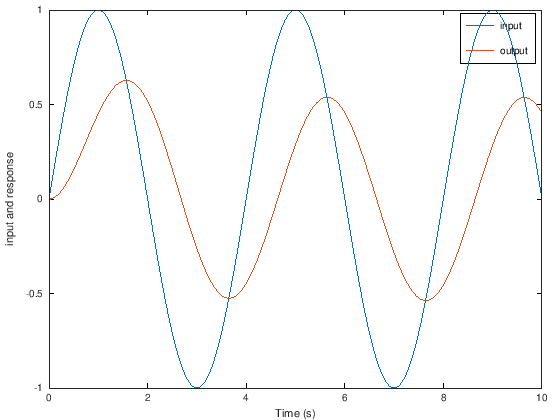

In [3]:
s = tf('s');
%set up the system we wish to simulate
P = 1/(s+1);
%set up the input signal we will give to the system
w = .5*pi;
t = linspace(0,10,1000);
U = 1;%unity sinusoidal input
u = U*sin(w*t);%sinusoidal input
%now simulate the system response to this input
[y,t] = lsim(P,u,t);
%now plot the input and output together to compare
plot(t,u,t,y)
legend('input','output')
xlabel('Time (s)')
ylabel('input and response')

As you can see, the response $y(t)$'s first peak is a different magnitude than the others, but after its transients die out, it responds to the input with a consistent, sinusoidal output that is of a different magnitude than the input, and that is also "lagging" by about 0.65 seconds, but that has the same frequency as the input. *Any linear system subjected to a sinusoidal input will have a sinusoidal output of the same frequency, but of different magnitude and different phase*. 

In this example, the input frequency was $\frac{\pi}{2}$ radians per second, or $\frac{1}{4}Hz$. This means that one cycle took $4s$ to complete. We call this the *period* $T$ of the sine wave signal. Each full cycle of a sine wave encompasses $2\pi$ radians. In general, we can calculate the phase lag of an output signal by looking at data by using the formula:

$$\phi = \frac{2\pi t_{lag}}{T}$$

Where $t_{lag}$ is the amount of time by which the output peaks "lag" behind the input peaks *at steady state*. In our case, this amounts to a phase lag of $\frac{2\pi(0.65)}{4}= 1$ radians, or about $57.5^\circ$. 

To calculate the *magnitude ratio* of the response, we simply take the magnitude of the output, and divide by the magnitude of the input. This tells us how much the system $P$ amplifies or attenuates the sinusoidal input signal at steady state. 

$$MR = \frac{\left|Y\right|}{\left|U\right|} $$

for our system, the output signal has an amplitude of roughly $Y=0.53$, while our input signal had a magnitude of $U=1$, so our magnitude ratio for this system at this frequency is $0.53$.

This paradigm of looking at how a system responds to sinusoidal inputs is useful for both the design of a physical system like a filter to *reject* sinusoidal inputs at a certain frequency, and for the design of control systems that might need to *track* sinusoidal inputs of a certain frequency. The magnitude ratio is particularly important for assessing how a system responds to a sine wave input, and the target magnitude ratio for a system depends on what the system is supposed to do. If our goal was for perfect tracking of an input of a particular frequency in the design of a control system, our closed loop system $G_{cl}$ should have a *magnitude ratio* of close to 1 for that frequency, but if our goal was to design a filter, we'd want our filter transfer function to have a *small* magnitude ratio, so that the system doesn't respond to, or "rejects", inputs of a certain frequency.


## Derivation: How can we use a transfer function to calculate the magnitude ratio and phase lag of a system's response to a sinusoidal input?




Consider a transfer function $P(s) = \frac{y(s)}{u(s)}$ that represents a system that we wish to study the response of under sinusoidal inputs. Now, imagine that we wish to subject the system to an input sine wave of the form:

$$u(t) = U\cos(\omega t)$$

This cosine function has the following representation in the Laplace domain:

$$u(s) = U\frac{s}{s^2+\omega^2}$$

The output of our transfer function $y(s)$ is thus:

$$y(s) = u(s)P(s) = U\frac{s}{s^2+\omega^2} P(s) $$

Let's also make the assumption that $P(s)$ is stable and proper, and that it can be written in the popular "pole-zero" form as:

$$P(s) = A\frac{(s+z_1)(s+z_2)\ldots(s+z_m)}{(s+p_1)(s+p_2)\ldots(s+p_n)}$$

Typically, if we wanted to transform the response $y(s)$ back into the time-domain, we would break it down into a series of first-order "pieces" using the partial fraction expansion. This might look something like this, recognizing that we can break $s^2+\omega^2$ into $(s-j\omega)(s+j\omega)$:

$$ y(s) = U\frac{s}{(s+j\omega)(s-j\omega)}P(s)=\frac{K_1}{s-j\omega} + \frac{K_1^\star}{s+j\omega} + TERMS\:FROM\: sP(s)$$

Where $K_1$ is a complex term (see [this link](https://www.khanacademy.org/math/algebra-home/alg-rational-expr-eq-func/alg-partial-fraction/v/partial-fraction-expansion-1) for a review of partial fraction expansions, in case you're rusty) and $K_1^\star$ is the complex conjugate of $K_1$. We aren't too concerned at the moment about what the rest of the $K$ values for the partial fraction expansion are... why? because these terms all have to do with the *dynamic* or *transient* response of $y(s)$, and thus the *transient* response of $y(t)$. If we're interested in the *steady state* sinusoidal response of our system to the sinusoidal input, these terms will eventually die out (literally go away-- remember that the final value theorem involves setting $s=0$!) if $P(s)$ is stable. This leaves us with the following modification, which will tell us about the *sinusoidal steady state* of our output, which we'll call $y_{ss}(s)$. Remember that unlike the case where we can use the final value theorem to find a single number representing our system's final value, we can't just find one number here... our system's output will oscillate forever, just like the input.

$$y_{ss}(s) =  U\frac{s}{(s+j\omega)(s-j\omega)}P(s)=\frac{K_1}{s-j\omega}+\frac{K_1^\star}{s+j\omega}$$

Now, what we need to do is solve for the complex conjugate factors $K_1 = a + bj$ and $K_1^\star = a-bj$. To find $K_1$ and $K_1^\star$, we multiply all of the terms in our equation for $y(s)$ by $(s-j\omega)$.

$$ U\frac{s}{(s+j\omega)(s-j\omega)}P(s) (s-j\omega) = \frac{K_1}{s-j\omega}(s-j\omega) + \frac{K_1^\star}{s+j\omega}(s-j\omega)$$

Now, what you should notice right away when we perform this multiplication of the entire equation is that some terms will cancel. What we're left with is:

$$ U\frac{s}{(s+j\omega)}P(s)  = K_1 + \frac{K_1^\star}{s+j\omega}(s-j\omega)  $$

Next, let's evaluate the whole equation at a very special value of $s$, which is $s=j\omega$. Why this point? For the purposes of this class, let's just assume that we know this point will cause a lot of terms to drop out of our equation for $y_{ss}(s)$. In causing terms to drop out, choosing $s=j\omega$ affords us a way to solve for the complex partial fraction coefficient $K_1$. 

$$\begin{matrix}& \left.\left[ U\frac{s}{(s+j\omega)}P(s)  = K_1 + \frac{K_1^\star}{s+j\omega}(s-j\omega)  \right]\right|_{s=j\omega} \\ =& U\frac{j\omega}{(j\omega+j\omega)}P(j\omega)  = K_1 + \frac{K_1^\star}{j\omega+j\omega}(j\omega-j\omega) \end{matrix}$$


It should be clear now that $(j\omega-j\omega)=0$, and so the $K_1^\star$ term drops out, leaving us with:

$$U\frac{j\omega}{(j\omega+j\omega)}P(j\omega)  = K_1$$

now remember that $K_1$ is a complex conjugate number (as of now, we still don't know what it is!). But if we look at the left-hand side of the equation, we can cancel a factor of $j\omega$, and what we're left with is:

$$\frac{U}{2} P(j\omega) = K_1$$



Now, we know that a transfer function evaluated at some particular point $s=\sigma+j\omega$ is always a complex number, which has a magnitude and a phase associated with it. We also know that $K_1$ will be some complex number, and can also be written as a combination of a magnitude and a phase angle. Using this fact, we can write:

$$K_1=\frac{U}{2}\left|P(j\omega)\right|e^{j\angle P(j\omega)}$$

Great! We found $K_1$, and now we can explicitly find its imaginary and real components $K_1 = a+bj$. In particular, because we know that Euler's formula tells us that:

$$e^{j\theta} = cos\theta + j \sin \theta$$

We can write $K_1$ as:

$$K_1 = a+bj = \frac{U}{2}\left|P(j\omega)\right|cos(\angle P(j\omega)) + j\frac{U}{2}\left|P(j\omega)\right|sin(\angle P(j\omega))$$

this allows us to find $a$ and $b$ as:

$$\begin{matrix} a&= \frac{U}{2}\left|P(j\omega)\right|cos(\angle P(j\omega)) \\ b&=\frac{U}{2}\left|P(j\omega)\right|sin(\angle P(j\omega))\end{matrix}$$

Which are both real numbers that we can calculate given the transfer function $P$ and the input frequency $\omega$. So now, let's go back to our equation for $y_{ss}(s)$. 

$$y_{ss}(s) =  U\frac{s}{(s+j\omega)(s-j\omega)}P(s)=\frac{K_1}{s-j\omega}+\frac{K_1^\star}{s+j\omega}$$

Getting a common denominator on the right-hand side yields:

$$y_{ss}(s) = U\frac{s}{(s+j\omega)(s-j\omega)} = \frac{(a+bj)(s+j\omega)+(a-bj)(s-j\omega)}{(s+j\omega)(s-j\omega)}$$

Expanding the numerator's terms, we obtain:

$$y_{ss}(s) = \frac{as+aj\omega+bjs-b\omega + as-aj\omega -bjs - b\omega}{(s+j\omega)(s-j\omega)}$$

Notice that all of the imaginary terms here will cancel out! What we're left with is:

$$y_{ss}(s) = 2\frac{as-b\omega}{(s^2+\omega^2)}$$

Now, we can turn to a Laplace table to find:

$$\begin{matrix} \mathcal{L}^{-1}\left[\frac{s}{s^2+\omega^2}\right]&=cos(\omega t)\\ \mathcal{L}^{-1}\left[\frac{1}{s^2+\omega^2}\right]&=sin(\omega t) \end{matrix}$$

Using the fact that a sine and a cosine function can be rewritten as a cosine function with a phase lag $\phi$, what we find after some algebraic manipulation is that:

$$y_{ss}(t) = \mathcal{L}^{-1}y_{ss}(s)= U\left|P(j\omega)\right|cos\left(\omega t + \angle(P(j\omega))\right)$$

This steady-state sinusoidal response has an *amplitude* $Y=U\left|P(s)\right|$ and a *phase* $\phi = \angle(P(j\omega))$. This is a very cool result! We've just shown, using the Laplace Transform, that if we can find the magnitude of our plant transfer function $P(s)$ evaluated as a complex number at some input frequency $\omega$, we have found the magnitude **ratio** of the system's steady-state response to the sinusoidal input. We also showed that the angle of the complex number $P(j\omega)$ is the phase difference between the input and output sinusoids at steady state. Note that there are other ways to tackle this derivation using the Fourier Transform, using the method of undetermined coefficients, et al., but this derivation explicitly leverages our knowledge of the Laplace Transform and transfer functions.

## *Disciplined Process:* Finding the amplitude and phase of a system's response to a sinusoidal input

In summary, the derivation above gave us the following information:

1. If a system represented by a transfer function $P(s)=\frac{y(s)}{u(s)}$ is subjected to a sinusoidal input of magnutude $U$ and frequency $\omega$, or $u(t) = Ucos\omega t$, the output of the system at steady state, $y_{ss}(t)$ is also a sinusoid with a different magnitude and phase angle than the input, but with the same frequency $\omega$.
2. The magnitude ratio $\frac{Y}{U}$ of the output sinusoid's amplitude to the input sinusoid's amplitude is $MR = \left|P(j\omega)\right|$. To find it, substitute $s=j\omega$ into the system transfer function $P(s)$ and find the magnitude of the resulting complex number.
3. The phase lag $\phi$ of the output sinusoid behind the input sinusoid is $\phi = \angle(P(j\omega))$. Find it by substituting $s=j\omega$ into the system transfer function $P(s)$ and finding the angle of the resulting complex number.

This procedure will allow us to find the magnitude and phase of the response of any system described by some transfer function $P(s)$ to any sinusoidal input. We can use this to find out how well a filter works when a sinusoidal noise source has a particular frequency, or see how well a closed-loop control system we designed can track a sinusoidal request $r(t)$ at a given frequency.

# Example: Find the magnitude and phase of a steady-state sinusoidal response

In the introduction to this notebook, we looked "experimentally" at the response of the transfer function:

$$P(s) = \frac{1}{s+1}$$

to a sine wave of magnitude $U=1$. What we found by looking at the plot of the output "data" (from MATLAB's simulation of the response) was that we had a magnitude ratio of $MR=0.53$ and a phase lag of $57.5^\circ \approx 1\:rad$. Let's see if we can reproduce those results using the method presented above.

First, we substitute $s=j\omega$ into our transfer function $P(s)$.

$$P(j\omega) = \frac{1}{j\omega +1}$$

Then, we find the magnitude ratio or ratio of the output amplitude to the input amplitude $MR=\frac{Y}{U}=\left|P(j\omega)\right|$:

$$\left|P(j\omega)\right| = \frac{\sqrt{1^2+0^2}}{\sqrt{\omega^2+1^2}}$$

Substituting in $\omega=\frac{\pi}{2}$ gives us:

$$\left|P(j\frac{\pi}{2})\right| = \frac{1}{\sqrt{1+\frac{\pi^2}{2^2}}} = 0.5370$$

What this means is that for every unit of input amplitude, the steady state sinusoid that the system gives us has a little over half of the magnitude at this frequency. Now, to find out how far the output lags behind the input, we calculate the phase as:

$$\phi(j\omega) = \angle(P(j\omega)) = \tan^{-1}\frac{0}{1} - \tan^{-1}\frac{\frac{\pi}{2}}{1} \approx -1 \: rad$$

Note that these predictions match our observations from the plot of the "data" above very nicely. Also note that the negative result for $\phi$ means that the system output does indeed lag *behind* the input.

# Exercises: Frequency Response. Due Wednesday, Nov. 11 before class

Using MATLAB/Octave for finding angles and magnitudes, manually calculate and plot the frequency responses of the following transfer functions at 100 logarithmically spaced frequencies between $0.1\frac{rad}{s}$ and $500\frac{rad}{s}$. Create this vector of frequencies using the command "logspace(log10(minimum_freq),log10(maximum_freq),length)." For each, plot the magnitude ratio of the response vs. frequency and the phase lag of the response vs. frequency. *Use a logarithmic  scale for both frequency and magnitude ratio* when plotting.

Once you write your MATLAB/Octave code to calculate the magnitude and phase at any given value of $\omega$, this should go very quickly! You do not need any hand calculations for this assignment.

**Note: you may not use the 'bode' command for this assignment, unless it is used to check your work. It is meant to introduce you to frequency response, so it is important that you learn to produce frequency response plots using the magnitude and phase equations directly before moving to the 'easy tool' that hides the process.**

## Exercise 1

$$P(s) = \frac{1}{s+1}$$

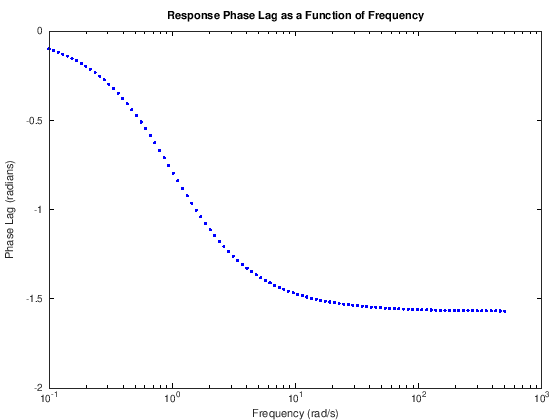

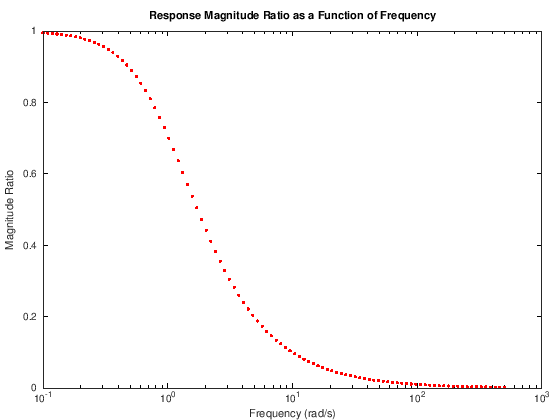

In [10]:
s = tf('s');
P1 = 1/(s+1);

minimum_freq = 0.1;
maximum_freq = 500;
w = logspace(log10(minimum_freq),log10(maximum_freq),100);

num1 = 1;
den1 = w.*1j + 1;

magRatio1 = abs(num1./den1);
phaseLag1 = angle(num1) - angle(den1);

figure()
semilogx(w,magRatio1,'r.')
xlabel('Frequency (rad/s)')
ylabel('Magnitude Ratio')
title('Response Magnitude Ratio as a Function of Frequency')
figure()
semilogx(w,phaseLag1,'b.')
xlabel('Frequency (rad/s)')
ylabel('Phase Lag (radians)')
title('Response Phase Lag as a Function of Frequency')

## Exercise 2

$$P(s) = \frac{10}{s+1}$$

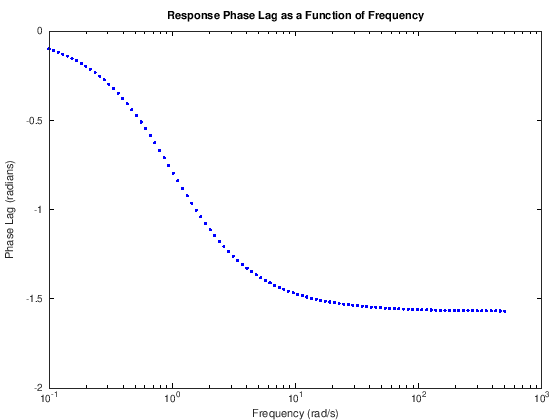

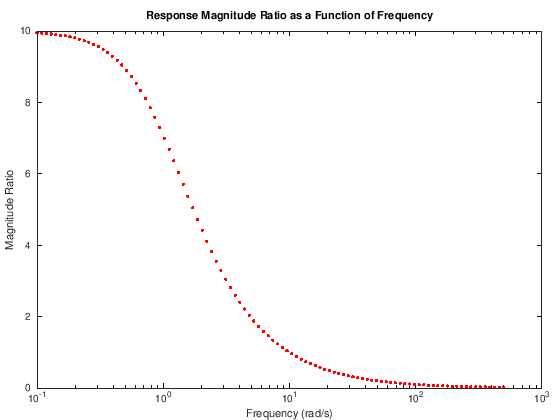

In [11]:
num2 = 10;
den2 = w.*1j + 1;

magRatio2 = abs(num2./den2);
phaseLag2 = angle(num2) - angle(den2);

figure()
semilogx(w,magRatio2,'r.')
xlabel('Frequency (rad/s)')
ylabel('Magnitude Ratio')
title('Response Magnitude Ratio as a Function of Frequency')
figure()
semilogx(w,phaseLag2,'b.')
xlabel('Frequency (rad/s)')
ylabel('Phase Lag (radians)')
title('Response Phase Lag as a Function of Frequency')

## Exercise 3

$$P(s) = \frac{1}{s+100}$$

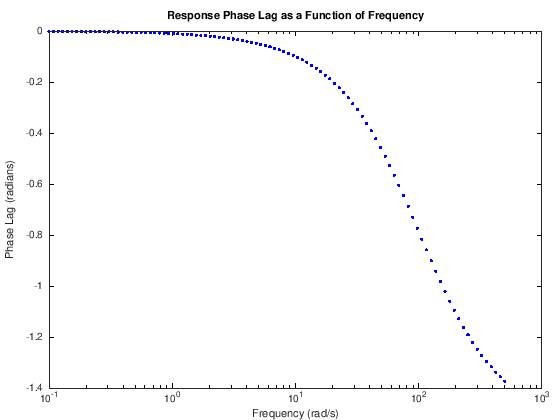

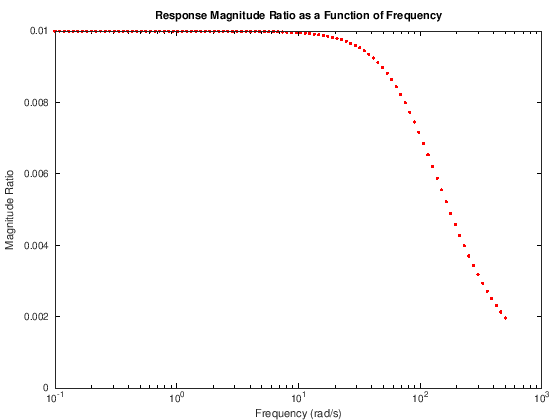

In [12]:
num3 = 1;
den3 = w.*1j + 100;

magRatio3 = abs(num3./den3);
phaseLag3 = angle(num3) - angle(den3);

figure()
semilogx(w,magRatio3,'r.')
xlabel('Frequency (rad/s)')
ylabel('Magnitude Ratio')
title('Response Magnitude Ratio as a Function of Frequency')
figure()
semilogx(w,phaseLag3,'b.')
xlabel('Frequency (rad/s)')
ylabel('Phase Lag (radians)')
title('Response Phase Lag as a Function of Frequency')

## Exercise 4

$$P(s) = \frac{s+1}{s^2+5s+50}$$

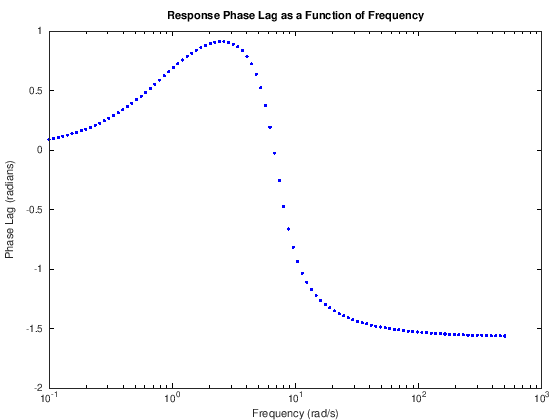

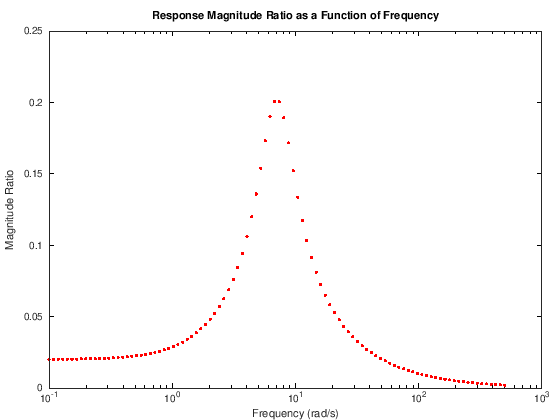

In [13]:
num4 = w.*1j + 1;
den4 = (w.*1j).^2 + 5.*w.*1j + 50;

magRatio4 = abs(num4./den4);
phaseLag4 = angle(num4) - angle(den4);

figure()
semilogx(w,magRatio4,'r.')
xlabel('Frequency (rad/s)')
ylabel('Magnitude Ratio')
title('Response Magnitude Ratio as a Function of Frequency')
figure()
semilogx(w,phaseLag4,'b.')
xlabel('Frequency (rad/s)')
ylabel('Phase Lag (radians)')
title('Response Phase Lag as a Function of Frequency')

## Exercise 5

Comment in the markdown cell below about your observations concerning the differences in the responses of each transfer function as a function of frequency. Comment specifically about what the magnitude and phase plot shapes mean.  Idenitfy under what conditions the response magnitude ratio is highest in terms of the steady state gain and/or eigenvalues of each system.

The first two exercises have transfer functions which are scaled versions of one another. The overal shape of the magnitude ratio plots as a function of frequency have the same general shape. The only difference is that the second exercise (which has the same transfer function as the first example just multiplied by 10), is that the magnitude ratio values for the second exercise are 10x that of the first exercise. This makes sense logically as these two exercises have the same transfer functions just scaled somewhat differently. Specifically for the general shape, the magnitude ratio is the highest for lower frequencies and lowest for higher frequencies. This is because the numerator is held at a constant value, whereas the denominator will change (specifically increasing with increasing frequency). Thus as the denominator increases (magnitude of the input), the numerator (magnitude of the output response) remains the same. This correlates to lower magnitude ratio with higher frequencies. The phase lag as a function of frequency for the first two exercises are exactly the same, initially starting at a smaller magnitude phase lag and increasing in magnitude with increasing frequency. These plots for phase lag are the same as only the numerator differs between these two exercises. The angle of the numerator is the same between these two exercises as they are both positive, real numbers, thus creating an angle of $0^o$. 

For the third exercise, there is still only one pole (like the first two exercises), but the actual value of the pole has been changed, specifically it is moved farther left on the s-plane. The plot of the magnitude ratio as a function of frequency has a similar shape to the first two exercises, but similar scaling the numerator, changing the pole value by a specific factor (in this case by a factor of 100), the magnitude ratio is scaled the same. Specifically, where the first exercise has a pole at s = -1 and the magnitude ratio begins at 1 and goes to 0, the third exercise has a pole at s = -100 and the magnitude ratio begins at 0.01 and goes to approximately 0. The phase lag plot is also similar to that of the first two exercises, although it appears to change more slowly in comparison to the first to exercises. 

For the last exercise, the phase lag plot begins positive and then transtions negative. This can be attributed to the addition of the zero, which we've seen dictates the influence of the derivative of the input. Specifically, a zero tries to "look ahead" and predict the response of a system, which correlates to a positive phase lag. As frequency is increased, the effect of the zero becomes less dominant and thus the phase lag is seen to transtion negative. For the magnitude ratio, for this second order system with a zero, the magnitude ratio is maximized at approximately 10 rad/s. Otherwise, the magnitude ratio remains almost zero for very low and very high frequencies. 